In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [63]:
train = pd.read_csv('titanic_train.csv')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


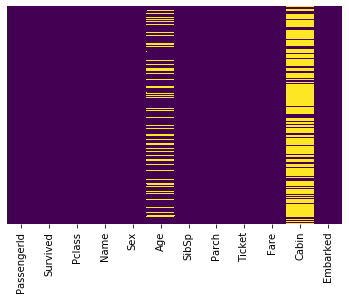

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [7]:
sns.set_style('whitegrid')

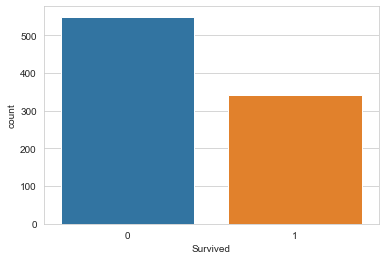

In [8]:
sns.countplot(x = 'Survived', data = train)

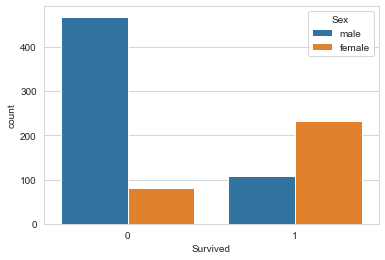

In [9]:
 sns.countplot(x = 'Survived', hue = 'Sex', data = train)

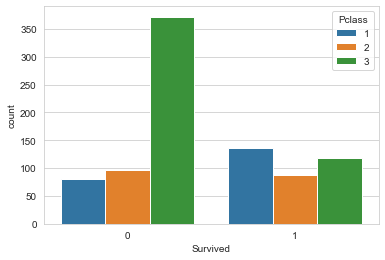

In [10]:
 sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

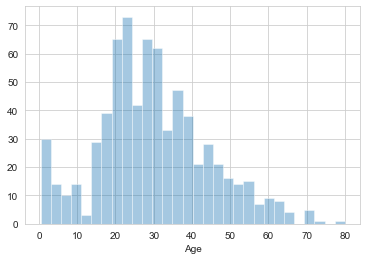

In [13]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


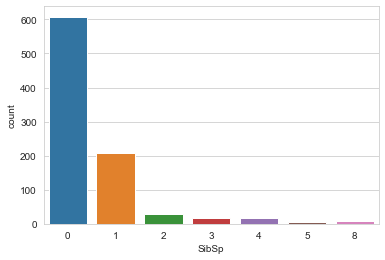

In [16]:
sns.countplot(x = 'SibSp', data= train)

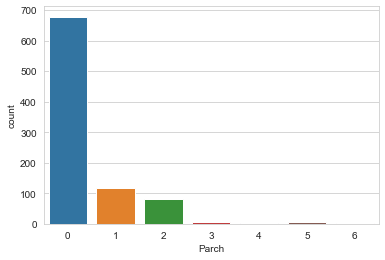

In [17]:
sns.countplot(x = 'Parch', data= train)

In [32]:
import cufflinks as cf

In [33]:
cf.go_offline()

In [35]:
train['Fare'].iplot(kind = 'hist', bins = 40)

# **Part 2 - Dealing with Missing Data**

In [38]:
train[['Pclass', 'Fare']].pivot(columns='Pclass', values='Fare').iplot(kind='box')

In [65]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: 
            return 37
        elif Pclass == 2: 
            return 29
        else: 
            return 24
    else: 
        return Age

In [66]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)

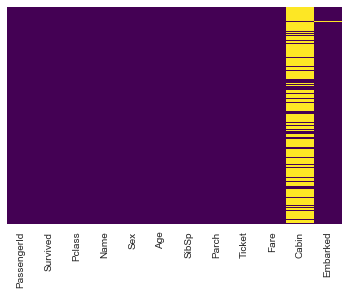

In [67]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [68]:
train.drop('Cabin', axis=1, inplace = True)

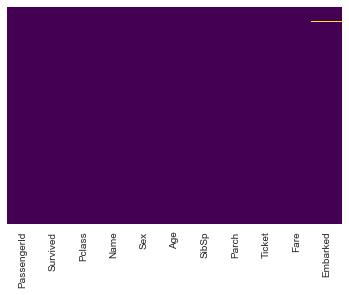

In [69]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [70]:
train.dropna(inplace = True)

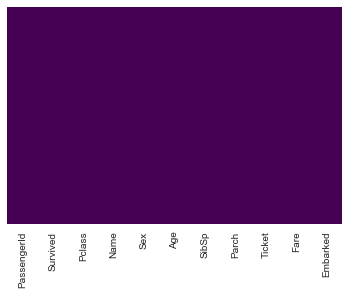

In [71]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [72]:
Sex = pd.get_dummies(train['Sex'], drop_first = True)

In [74]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [76]:
train = pd.concat([train, Sex,embark ], axis = 1)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [78]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis =1, inplace=True)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_model = LogisticRegression()

In [90]:
log_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
predictions = log_model.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       174
           1       0.85      0.65      0.74       120

    accuracy                           0.81       294
   macro avg       0.82      0.78      0.79       294
weighted avg       0.81      0.81      0.80       294



In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, predictions)

array([[160,  14],
       [ 42,  78]], dtype=int64)